In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

us_data = pd.read_csv('./data/US_all.csv')
us_data.head()
#calculate %NaN in every columns
us_data.isnull().mean().sort_values(ascending=False)
#remove all columns with more than 20% NaN
us_data_n = us_data.loc[:, us_data.isnull().mean() < .2]

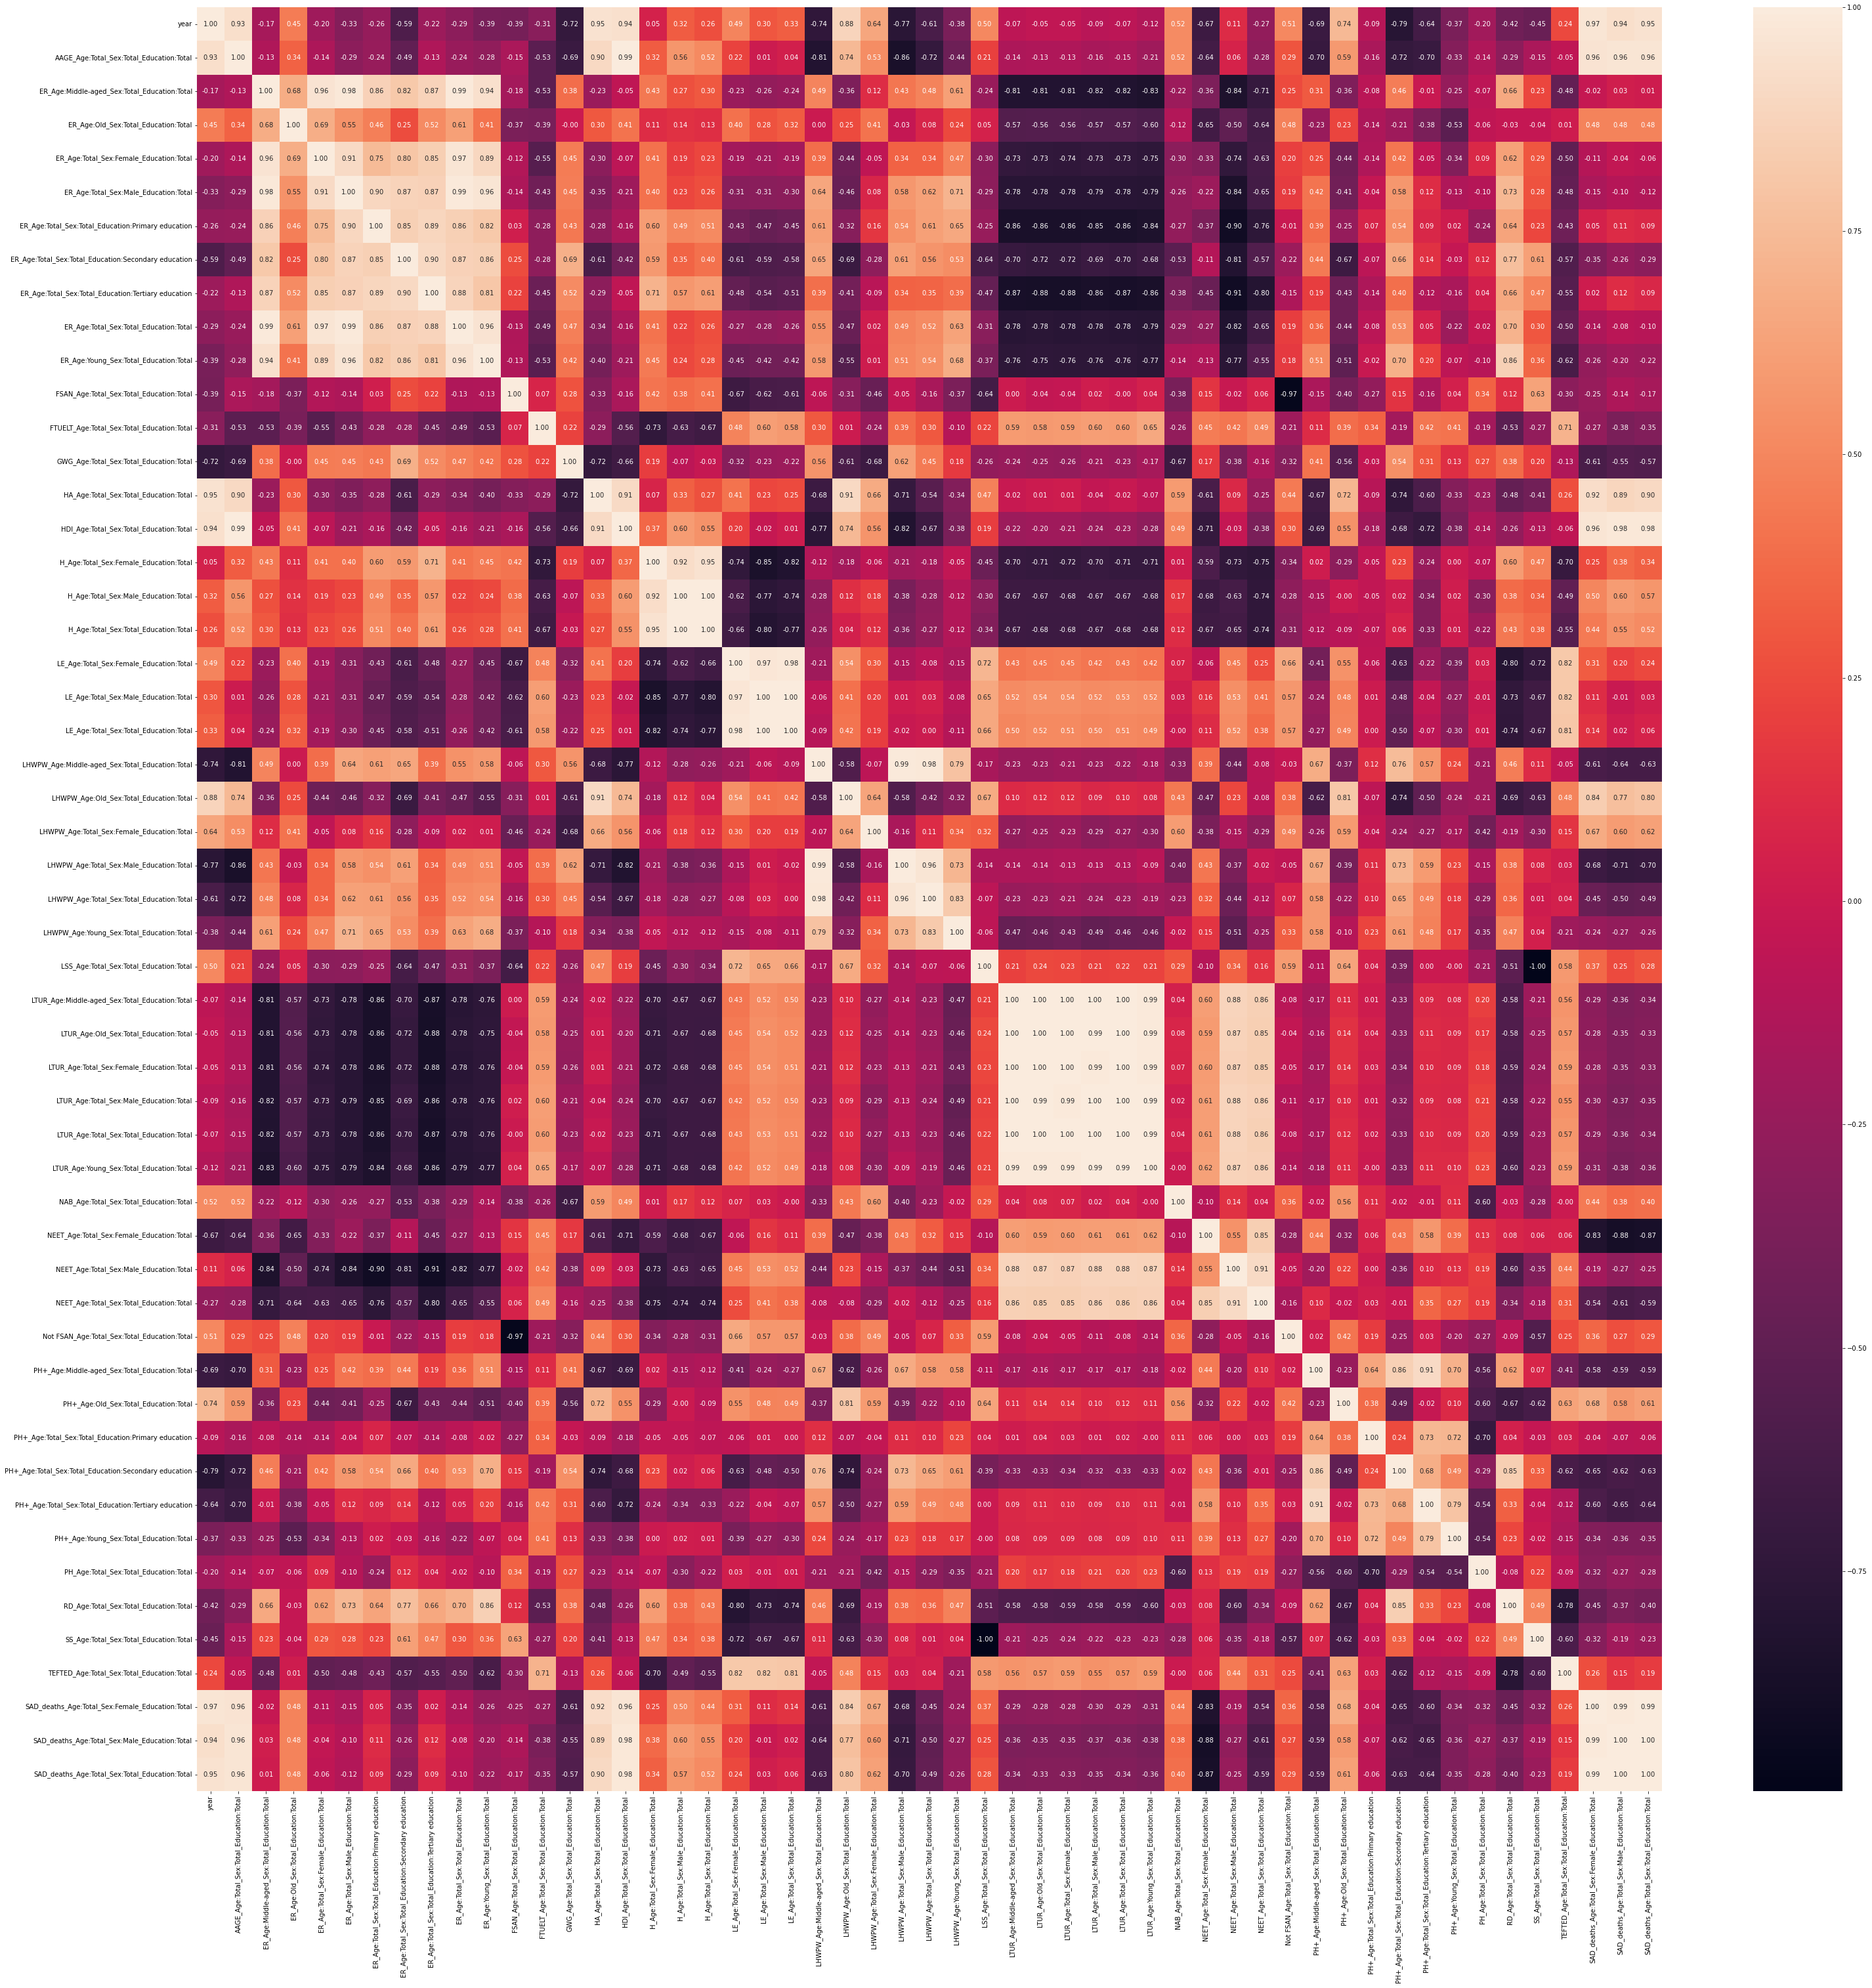

In [34]:
#correlogram for above data 

plt.figure(figsize=(50,50))
sns.heatmap(us_data_n.corr(), annot=True, fmt=".2f")
# plt.show()
#save this plot
plt.savefig('./results/correlogram.jpg')

#### As per this correlogram last 3 columns, are most correlated with, PH+seconda+tertiary_educationtotal_age negatively correlated.
positively correlated with:
Year (.95)
AAGE_age (0.96)
HA (.92)
HDI (0.96-.98)
LHWPW M&F(0.77-0.84)
negatively correlated:
PH+seconda+tertiary_educationtotal_age
Neet (0.83-0.88)

In [10]:
#plot for other countries dataset saved in data folder use for loop to plot correlogram for all countries
import os
for file in os.listdir('./data/country_based_divided'):
    if file.endswith('.csv'):
        data = pd.read_csv(f'./data/country_based_divided/{file}')
        data_n = data.loc[:, data.isnull().mean() < .2]
        plt.figure(figsize=(50,50))
        sns.heatmap(data_n.corr(), annot=True, fmt=".2f")
        plt.savefig(f'./results/{file}.jpg')
        plt.close()

In [5]:
#combine all countries data into one and use country column to differentiate between them
import os
all_data = pd.DataFrame()
for file in os.listdir('./data'):
    if file.endswith('.csv'):
        data = pd.read_csv(f'./data/{file}')
        data_n = data.loc[:, data.isnull().mean() < .2]
        data_n['country'] = file.split('_')[0]
        all_data = pd.concat([all_data, data_n])
all_data.to_csv('./data/all_countries.csv', index=False)

C:\Users\91981\AppData\Local\Temp/ipykernel_27800/2418390859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n['country'] = file.split('_')[0]
